<a href="https://colab.research.google.com/github/najibur-rahman/Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()


In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

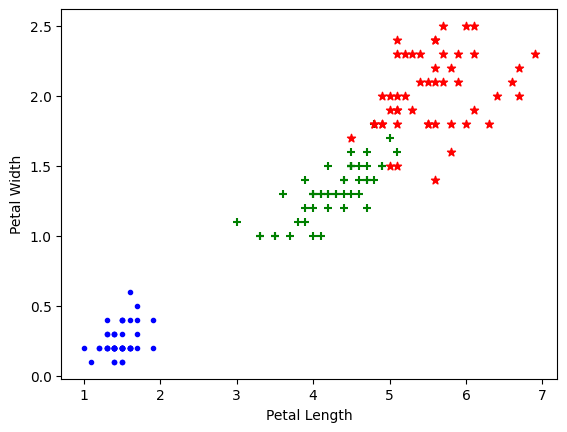

In [ ]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', marker='+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red', marker='*')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='blue', marker='.')


In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(['target', 'flower_name'], axis = 'columns')
y = df.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11) # 11 nisi karon 150 data jar root n er man 12.45 so flooring kore 13 or 11 nibo

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
knn.predict(x_test)

array([0, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 2])

In [ ]:
knn.score(x_test, y_test) # 1 asar kotha

0.9666666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]])

Text(50.722222222222214, 0.5, 'Predict Data')

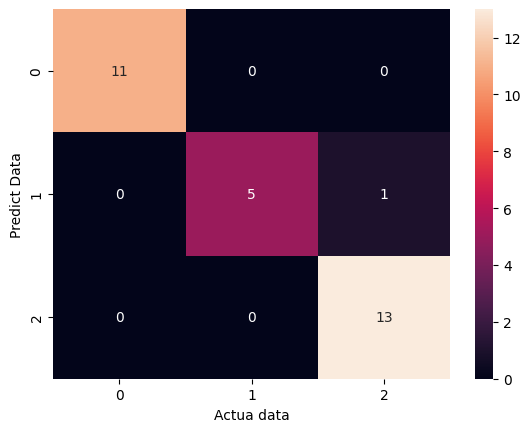

In [ ]:
sns.heatmap(cm, annot = True)
plt.xlabel('Actua data')
plt.ylabel('Predict Data')